### Dataloader

* First and hard way: defining the class to work with the csv folder, note that some value have to be changed according to the path and the csv, but in this way we get to keep all the coordinates we found in the images


In [38]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math 
import pandas as pd
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import os
from skimage import io

We need to di some work on the dataset to make it suitable for the DataLoader class

In [127]:
#df = pd.read_csv('/content/mask_info.csv')
#df['image'] = df['image'].replace({'dataset/': 'dataset_mask/'}, regex=True)
#df['class'] = df['class'].replace({'MASK': 0, 'BAD_MASK': 1, 'NO_MASK': 2})

#df.head()
#df['class'].value_counts()

#df.to_csv('mask_info.csv')

,Unnamed: 0,Unnamed: 0.1,image,class,bbox_x,bbox_y,bbox_w,bbox_h,kp1_x,kp1_y,kp2_x,kp2_y
0,0,0,dataset_mask/mask/luca_1616408746.jpg,0,262,46,253,210,338,144,412,140
1,1,1,dataset_mask/mask/luca_1616408748.jpg,0,247,63,243,224,296,154,357,138
2,2,2,dataset_mask/mask/luca_1616408750.jpg,0,222,75,241,246,257,183,317,158
3,3,3,dataset_mask/mask/luca_1616408751.jpg,0,273,67,249,230,396,155,462,164
4,4,4,dataset_mask/mask/luca_1616408752.jpg,0,274,79,224,239,432,130,474,140


In [131]:
class MaskDataset(Dataset):

  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.annotations)

  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 2])
    image = io.imread(img_path)
    y_label = torch.tensor(self.annotations.iloc[index, 3])
    bbox_x = torch.tensor(self.annotations.iloc[index, 4])
    bbox_y = torch.tensor(self.annotations.iloc[index, 5])
    bbox_w = torch.tensor(self.annotations.iloc[index, 6])
    bbox_h = torch.tensor(self.annotations.iloc[index, 7])
    kp1_x = torch.tensor(self.annotations.iloc[index, 8])
    kp1_y = torch.tensor(self.annotations.iloc[index, 9])
    kp2_x = torch.tensor(self.annotations.iloc[index, 10])
    kp2_y = torch.tensor(self.annotations.iloc[index, 11])
    
    if self.transform:
      image = self.transform(image)

    return (image, y_label) # if we add the bbox points and the keypoints in the return we can get those too

In [132]:
dataset = MaskDataset(csv_file = '/content/mask_info.csv', root_dir= '/content/drive/MyDrive/', transform= transforms.ToTensor())
dataiter = torch.utils.data.DataLoader(dataset, batch_size=6, shuffle=True)

In [133]:
examples = iter(dataiter)
samples, labels = examples.next()
print(samples.shape, labels)

torch.Size([6, 3, 480, 640]) tensor([1, 2, 2, 1, 1, 0])


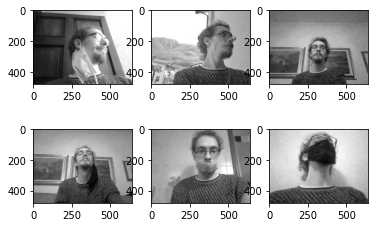

In [134]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

* Second and most simple way: working directly with image folder.
This is just a model, we need to add train and test folder and all the images

In [15]:
data_dir = '/content/drive/MyDrive/dataset_mask'



dataset_img = datasets.ImageFolder(data_dir, transform=transforms.ToTensor())
dataloader_img = torch.utils.data.DataLoader(dataset_img, batch_size=6, shuffle=True)

In [16]:
examples = iter(dataloader_img)
samples, labels = examples.next()
print(samples.shape, labels)

torch.Size([6, 3, 480, 640]) tensor([0, 0, 1, 2, 2, 2])


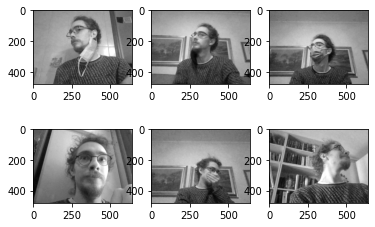

In [17]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()